# HW 8: Writing a simple API client

**Name:** Elliott Tran | **Date:** 11/21/2020 | **Class:** QMSS G5072 Modern Data Structures

In [1]:
import requests
import json
import pandas as pd

#### 1. Choose an API

**a) Choose an API and briefly describe the type of data you can obtain from it. Note: Please do not use any of the APIs we covered in lecture (e.g. NYTimes, Github etc.).**

I will be exploring the Consumer Complaint Database API by the Consumer Financial Protection Bureau (CFPB). As stated in their [website](https://cfpb.github.io/api/ccdb/):
>The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily.

**b) Provide a link to the API documentation and**  

See the API Documenation [here](https://cfpb.github.io/api/ccdb/api.html).

**c) the base URL of the API you intend to use.**

Base URL Link: https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/

#### 2. Authentication

**a) Briefly explain how the API authenticates the user.** <br>

The API does not have an Authentication process.

However, many other API authenticate users with an API key, a credential made up of a series of numbers and letters that is unique to a user. The key is used to overcome security weaknesses with shared credentials. When the user enters their key into the API client (along with other steps) and the it is identified as a recogized credential, the user then have access to the data. 

**b) Apply for an API key if necessary and provide the information (with relevant URL) how that can be done. Do not include the API key in the assignment submission.** 

The API that I am using does not require a key.

#### 3. Send a Simple GET request

a) Execute a simple GET request to obtain a small amount of data from the API. Describe a few query parameters and add them to the query. If you have a choice of the output the API returns (e.g. XML or JSON), I suggest to choose JSON because it easier to work with. Your output here should include the code for the `GET` request, including the query parameters, as well as a snippet of the output.  
b) Check (and show) the status of the request.  
c) Check (and show) the type of the response (e.g. XML, JSON, csv).

*First, send a very simple request*

In [2]:
params = {'company_received_min': '2017-03-04', 'company_received_max':'2020-11-23'}
r = requests.get('https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/', params = params)

*Confirm the request was successful*

In [3]:
r.status_code

200

*Check the request returned the correct type*

In [4]:
r.headers['content-type']

'application/json'

#### 4. Parse the response and Create a dataset

a) Take the response returned by the API and turn it into a useful Python object (e.g. a list, vector, or pandas data frame). Show the code how this is done.  

b) Using the API, create a dataset (in data frame format) for multiple records. I'd say a sample size greater than 100 is sufficient for the example but feel free to get more data if you feel ambitious and the API allows you to do that fairly easily. The dataset can include only a small subset of the returned data. Just choose some interesting features. There is no need to be inclusive here.

c) Provide some summary statistics of the data. Include the data frame in a .csv file called `data.csv` with your submission for the grader.

*Convert the json string into a python dictionary and show the keys*

In [5]:
 ccd1_json = json.loads(r.content) #loads as dictionary
 print(type(ccd1_json)) 

<class 'dict'>


In [114]:
print(ccd1_json.keys()) #here are the keys for the top-level json output
print(ccd1_json['hits'].keys())

dict_keys(['took', 'timed_out', '_shards', 'hits', 'aggregations', '_meta'])
dict_keys(['total', 'max_score', 'hits'])


*Drill down to the individual complaints data by using the "hits" index*

In [7]:
#example query
print(json.dumps(ccd1_json['hits']['hits'][0], indent = 3, sort_keys = True)) #json output for one complaint

{
   "_id": "965957",
   "_index": "complaint-public-v1",
   "_score": 1.0,
   "_source": {
      "company": "Sortis Financial, Inc.",
      "company_public_response": null,
      "company_response": "Closed with explanation",
      "complaint_id": "965957",
      "complaint_what_happened": "",
      "consumer_consent_provided": "N/A",
      "consumer_disputed": "No",
      "date_received": "2014-08-02T12:00:00-05:00",
      "date_sent_to_company": "2017-04-27T12:00:00-05:00",
      "has_narrative": false,
      "issue": "Loan modification,collection,foreclosure",
      "product": "Mortgage",
      "state": "MI",
      "sub_issue": null,
      "sub_product": "Home equity loan or line of credit",
      "submitted_via": "Web",
      "tags": null,
      "timely": "Yes",
      "zip_code": "48380"
   },
   "_type": "_doc",
   "sort": [
      1.0,
      "965957"
   ]
}


*Send another request, this time with a finite size. Then convert the json into a pandas dataframe and explore its content.*

In [8]:
params = {'company_received_min': '2017-03-04', 'company_received_max':'2020-11-23', 'size': 500}
r2 = requests.get('https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/', params = params)

In [9]:
ccd_json = json.loads(r2.content) #loads as dictionary

In [10]:
#transform into dataframe
ccd_json_df = pd.json_normalize(data = ccd_json['hits']['hits'], sep = "_")

In [11]:
ccd_json_df.head(5)

,_index,_type,_id,_score,_source_tags,_source_zip_code,_source_complaint_id,_source_issue,_source_date_received,_source_state,...,_source_company_response,_source_company,_source_submitted_via,_source_date_sent_to_company,_source_company_public_response,_source_sub_product,_source_timely,_source_complaint_what_happened,_source_sub_issue,_source_consumer_consent_provided
0,complaint-public-v1,complaint,3280158,1.0,Servicemember,76542,3280158,Attempts to collect debt not owed,2019-06-19T12:00:00-05:00,TX,...,Closed with explanation,"Credit Management Control, Inc.",Web,2019-06-19T12:00:00-05:00,Company believes it acted appropriately as aut...,I do not know,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v1,complaint,3076479,1.0,None,95603,3076479,Incorrect information on your report,2018-11-16T12:00:00-05:00,CA,...,Closed with explanation,"EQUIFAX, INC.",Web,2018-11-16T12:00:00-05:00,None,Credit reporting,Yes,,Information belongs to someone else,Consent not provided
2,complaint-public-v1,complaint,3278078,1.0,None,33467,3278078,Incorrect information on your report,2019-06-18T12:00:00-05:00,FL,...,Closed with explanation,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Web,2019-06-18T12:00:00-05:00,Company has responded to the consumer and the ...,Credit reporting,Yes,,Information belongs to someone else,Consent not provided
3,complaint-public-v1,complaint,3233186,1.0,None,720XX,3233186,Incorrect information on your report,2019-05-05T12:00:00-05:00,AR,...,Closed with explanation,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Web,2019-05-05T12:00:00-05:00,Company has responded to the consumer and the ...,Credit reporting,Yes,"XX/XX/2019 I own a XXXX credit card, an XXXX c...",Account information incorrect,Consent provided
4,complaint-public-v1,complaint,3198946,1.0,None,23113,3198946,Managing an account,2019-04-02T12:00:00-05:00,VA,...,Closed with explanation,PNC Bank N.A.,Referral,2019-04-02T12:00:00-05:00,None,Checking account,Yes,,Deposits and withdrawals,N/A


In [12]:
print(ccd_json_df.shape) #show shape and variables contained in the cleaned up object
print(ccd_json_df.dtypes)

(500, 23)
_index                                object
_type                                 object
_id                                   object
_score                               float64
_source_tags                          object
_source_zip_code                      object
_source_complaint_id                  object
_source_issue                         object
_source_date_received                 object
_source_state                         object
_source_consumer_disputed             object
_source_product                       object
_source_has_narrative                   bool
_source_company_response              object
_source_company                       object
_source_submitted_via                 object
_source_date_sent_to_company          object
_source_company_public_response       object
_source_sub_product                   object
_source_timely                        object
_source_complaint_what_happened       object
_source_sub_issue                     object


In [13]:
#was the complaint addressed in a timely fashion?
ccd_json_df['_source_timely'].value_counts()

Yes    495
No       5
Name: _source_timely, dtype: int64

In [14]:
#complaints by state
ccd_json_df['_source_state'].value_counts()

FL    64
CA    57
TX    47
NY    40
IL    27
GA    22
NC    19
NJ    19
OH    17
VA    13
PA    13
MD    12
AL    12
MI    10
CO    10
MO    10
AZ     9
MN     8
OR     6
WA     6
UT     6
LA     6
WI     6
NV     5
CT     5
TN     5
IN     4
NH     4
AR     4
KS     4
MA     4
SC     3
KY     3
ME     2
IA     2
OK     2
MS     2
SD     2
DE     2
ND     1
Name: _source_state, dtype: int64

In [15]:
ccd_json_df['_source_product'].value_counts() #show counts of each complaint type

Credit reporting, credit repair services, or other personal consumer reports    241
Debt collection                                                                  94
Credit card or prepaid card                                                      50
Mortgage                                                                         43
Checking or savings account                                                      43
Money transfer, virtual currency, or money service                               10
Student loan                                                                      8
Payday loan, title loan, or personal loan                                         7
Vehicle loan or lease                                                             4
Name: _source_product, dtype: int64

*Save the output dataframe to a csv, if desired.*

In [16]:
#ccd_json_df.to_csv('data.csv')

#### 5. API Client

a) API client function

Lastly, let's try to wrap the code from the previous sections into a simple API client function. For example, in the [`pyzillow` package](https://pyzillow.readthedocs.io/en/latest/getting_started.html), the command `get_deep_search_results()` can be called with the following command

    get_deep_search_results(address = '2114 Bigelow Ave', 
    zipcode = '98109', rentzestimate = True)

For your API function, try to create a simple function that does the following things:

 - allows to user to specify some smallish set of query parameters (from Q.3a)  
 - run a GET request with these parameters  
 - check the status of the request the server returns and inform the user of any errors (from Q.3b)  
 - parse the response and return a Python object to the user of the function. You can choose whether returning a list (from Q.4a) or a data frame (from Q.4b) is best.
 - Add docstrings to the API client function that explain the paramters, the output, and ideally include a quick example.
 
Note: There is no need to make this into an Python package here. A simple function is sufficient.

In the notebook, include your full function to access the API functionality. Set some sensible default values for the query parameters.

Run the function for the default values and show the output in the notebook.

For this part of the question, I am not expecting a full-fledged API client. Rather, I want you to wrap some of the code from the previous questions into a function and generalize a bit.

In [17]:
from requests.exceptions import HTTPError

def get_state_complaints(state = 'NY', company_received_min = '2020-09-01', company_received_max = '2020-11-23', size = 25):
    """
    The function returns complaints from the the Consumer Complaint Database by state, the date range for the company to have received the complaint and the amount of query the user would like to return.

    Parameters
    ---
    state: string value that is the state abreviation for the state you would like to see complaints form
    company_received_min: string value of the earliest date you want to recall. Date format is "%Y-%m-%d"
    company_received_min: string value of the latest date you want to recall. Date format is "%Y-%m-%d"
    size: integer value of the number of returns you would like to receive from API. No limit is listed on the API documentation. 

    Returns
    ---
    output: pandas.DataFrame of the API with stated parameters
        Index: 
            RangeIndex
        Columns:
            _index: object
            _type: object
            _id: object
            _score: float64
            _source_tags: object
            _source_zip_code: object
            _source_complaint_id: object
            _source_issue: object
            _source_date_received: object
            _source_state: object
            _source_consumer_disputed: object
            _source_product: object
            _source_has_narrative: bool
            _source_company_response: object
            _source_company: object
            _source_submitted_via: object
            _source_date_sent_to_company: object
            _source_company_public_response: object
            _source_sub_product: object
            _source_timely: object
            _source_complaint_what_happened: object
            _source_sub_issue: object
            _source_consumer_consent_provided: object


    Example
    ---
    >>> df = get_state_complaints(state = 'NY', company_received_min = '2020-09-01', company_received_max = '2020-11-23', size = 25)
    >>> df.shape
    (25, 23)
    
    """
    try:
        params = {'state': state, 'company_received_min': company_received_min, 'company_received_max': company_received_max, 'size': size}
        response = requests.get('https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/', params = params)
        ccd_json = json.loads(response.content)
        ccd_json_df = pd.json_normalize(data = ccd_json['hits']['hits'], sep = "_")
        return ccd_json_dfb
        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')


In [19]:
get_state_complaints()

,_index,_type,_id,_score,_source_tags,_source_zip_code,_source_complaint_id,_source_issue,_source_date_received,_source_state,...,_source_company_response,_source_company,_source_submitted_via,_source_date_sent_to_company,_source_company_public_response,_source_sub_product,_source_timely,_source_complaint_what_happened,_source_sub_issue,_source_consumer_consent_provided
0,complaint-public-v1,complaint,3863717,1.0,None,11530,3863717,Managing an account,2020-09-23T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2020-09-24T12:00:00-05:00,None,Checking account,Yes,,Problem accessing account,N/A
1,complaint-public-v1,complaint,3888249,1.0,None,11741,3888249,Incorrect information on your report,2020-10-08T12:00:00-05:00,NY,...,Closed with explanation,"EQUIFAX, INC.",Web,2020-10-08T12:00:00-05:00,None,Credit reporting,Yes,,Information belongs to someone else,None
2,complaint-public-v1,complaint,3903450,1.0,None,13027,3903450,Problem with a credit reporting company's inve...,2020-10-16T12:00:00-05:00,NY,...,Closed with explanation,"EQUIFAX, INC.",Web,2020-10-16T12:00:00-05:00,None,Credit reporting,Yes,,Was not notified of investigation status or re...,None
3,complaint-public-v1,complaint,3937061,1.0,None,100XX,3937061,Incorrect information on your report,2020-11-04T12:00:00-05:00,NY,...,Closed with explanation,"EQUIFAX, INC.",Web,2020-11-04T12:00:00-05:00,None,Credit reporting,Yes,,Information belongs to someone else,None
4,complaint-public-v1,complaint,3862811,1.0,None,11238,3862811,Attempts to collect debt not owed,2020-09-24T12:00:00-05:00,NY,...,Closed with explanation,"EQUIFAX, INC.",Web,2020-09-24T12:00:00-05:00,None,Credit card debt,Yes,,Debt was result of identity theft,None
5,complaint-public-v1,complaint,3953649,1.0,None,100XX,3953649,Incorrect information on your report,2020-11-14T12:00:00-05:00,NY,...,Closed with explanation,Experian Information Solutions Inc.,Web,2020-11-14T12:00:00-05:00,Company has responded to the consumer and the ...,Credit reporting,Yes,,Information belongs to someone else,Other
6,complaint-public-v1,complaint,3943778,1.0,None,130XX,3943778,"Other features, terms, or problems",2020-11-09T12:00:00-05:00,NY,...,Closed with explanation,BARCLAYS BANK DELAWARE,Phone,2020-11-09T12:00:00-05:00,Company has responded to the consumer and the ...,General-purpose credit card or charge card,Yes,,Other problem,N/A
7,complaint-public-v1,complaint,3903604,1.0,None,11704,3903604,Problem with a credit reporting company's inve...,2020-10-16T12:00:00-05:00,NY,...,Closed with explanation,Experian Information Solutions Inc.,Web,2020-10-16T12:00:00-05:00,Company has responded to the consumer and the ...,Credit reporting,Yes,,Was not notified of investigation status or re...,Consent not provided
8,complaint-public-v1,complaint,3881028,1.0,None,None,3881028,Attempts to collect debt not owed,2020-10-05T12:00:00-05:00,NY,...,Closed with non-monetary relief,"Capio Partners, LLC",Web,2020-10-05T12:00:00-05:00,None,Medical debt,Yes,,Debt is not yours,None
9,complaint-public-v1,complaint,3894694,1.0,None,11238,3894694,Attempts to collect debt not owed,2020-10-12T12:00:00-05:00,NY,...,Closed with explanation,"EQUIFAX, INC.",Web,2020-10-12T12:00:00-05:00,None,Credit card debt,Yes,,Debt was result of identity theft,None


## Add another function to return complaints by type

In [233]:
from requests.exceptions import HTTPError

def get_complaints(complaint_type = ['Mortgage', 'Credit card', 'Credit reporting', 'Debt collection', 'Credit reporting, credit repair services, or other personal consumer reports', 'Credit card or prepaid card'], 
                   company_received_min = '2020-09-01', company_received_max = '2020-11-23', size = 10000):
    """
    The function returns complaints from the the Consumer Complaint Database countrywide by complaint type, for the date range for the company to have received the complaint and the amount of query the user would like to return.

    Parameters
    ---
    complaint_type: a list of types of complaints to return
    company_received_min: string value of thea earliest date you want to recall. Date format is "%Y-%m-%d"
    company_received_min: string value of the latest date you want to recall. Date format is "%Y-%m-%d"
    size: integer value of the number of returns you would like to receive from API. No limit is listed on the API documentation. 

    Returns
    ---
    output: pandas.DataFrame of the API with stated parameters
        Index: 
            RangeIndex
        Columns:
            _index: object
            _type: object
            _id: object
            _score: float64
            _source_tags: object
            _source_zip_code: object
            _source_complaint_id: object
            _source_issue: object
            _source_date_received: object
            _source_state: object
            _source_consumer_disputed: object
            _source_product: object
            _source_has_narrative: bool
            _source_company_response: object
            _source_company: object
            _source_submitted_via: object
            _source_date_sent_to_company: object
            _source_company_public_response: object
            _source_sub_product: object
            _source_timely: object
            _source_complaint_what_happened: object
            _source_sub_issue: object
            _source_consumer_consent_provided: object


    Example
    ---
    >>> df = get_complaints(complaint_type = ['Mortgage', 'Debt collection'])
    >>> df.shape
    (9, 19)
    
    """
    try:
        params = {'company_received_min': company_received_min, 'company_received_max': company_received_max, 'size': size}
        response = requests.get('https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/', params = params)
        ccd_json = json.loads(response.content)
        out_df = pd.DataFrame([complaint['_source'] for complaint in ccd_json['hits']['hits'] if complaint['_source']['product'] in complaint_type])
        return out_df
        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')


In [234]:
df = get_complaints(complaint_type = ['Mortgage', 'Debt collection', 'Credit card', 'Credit reporting'], 
                    company_received_min = '2017-09-01', company_received_max = '2020-11-23')
df.head(5)

,product,complaint_what_happened,date_sent_to_company,issue,sub_product,zip_code,tags,has_narrative,complaint_id,timely,consumer_consent_provided,company_response,submitted_via,company,date_received,state,consumer_disputed,company_public_response,sub_issue
0,Debt collection,,2017-09-15T12:00:00-05:00,False statements or representation,"Other (i.e. phone, health club, etc.)",32065,None,False,571656,Yes,N/A,Closed with explanation,Web,National Management Recovery Corp. (NMRC),2013-10-25T12:00:00-05:00,FL,No,None,Impersonated an attorney or official
1,Debt collection,,2020-11-23T12:00:00-05:00,Attempts to collect debt not owed,Other debt,60406,None,False,3971818,Yes,Consent not provided,Closed with explanation,Web,"I.C. System, Inc.",2020-11-23T12:00:00-05:00,IL,N/A,Company has responded to the consumer and the ...,Debt is not yours
2,Mortgage,,2020-11-23T12:00:00-05:00,Trouble during payment process,Conventional home mortgage,None,None,False,3971815,Yes,N/A,Closed with explanation,Phone,"SELECT PORTFOLIO SERVICING, INC.",2020-11-23T12:00:00-05:00,None,N/A,Company believes it acted appropriately as aut...,None
3,Debt collection,On XX/XX/2020 I received a letter from the dep...,2020-11-23T12:00:00-05:00,False statements or representation,I do not know,34112,None,True,3971801,Yes,Consent provided,Closed with explanation,Web,"Eagle Accounts Group, Inc.",2020-11-23T12:00:00-05:00,FL,N/A,Company has responded to the consumer and the ...,"Impersonated attorney, law enforcement, or gov..."
4,Mortgage,My wife and I paid off our mortgage of XX/XX/2...,2020-11-23T12:00:00-05:00,Closing on a mortgage,Conventional home mortgage,04861,None,True,3971775,Yes,Consent provided,Closed with explanation,Web,"Shellpoint Partners, LLC",2020-11-23T12:00:00-05:00,ME,N/A,Company believes it acted appropriately as aut...,None


### Demo a way to visualize the complaint information graphically
E.g. types of issues most common to "Debt Collection" complaints

<AxesSubplot:>

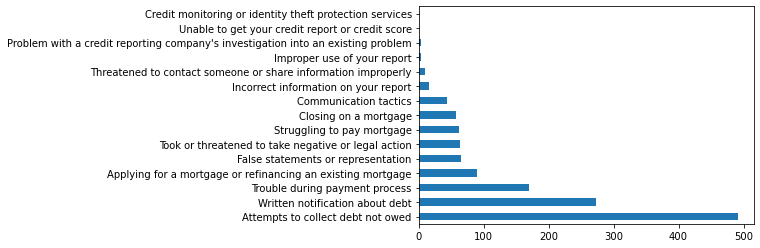

In [206]:
df = get_complaints(complaint_type = ['Mortgage', 'Debt collection', 'Credit card', 'Credit reporting'], 
                    company_received_min = '2017-09-01', company_received_max = '2020-11-23')
df['issue'].value_counts().plot.barh()

### Demo a way to visualize complaints over time
E.g. types of issues most common to "Debt Collection" complaints

In [245]:
df1 = get_complaints(company_received_min = '2020-09-01', company_received_max = '2020-09-10', complaint_type = ['Mortgage', 'Debt collection'])
df2 = get_complaints(company_received_min = '2020-09-11', company_received_max = '2020-09-20', complaint_type = ['Mortgage', 'Debt collection'])
df3 = get_complaints(company_received_min = '2020-09-21', company_received_max = '2020-09-30', complaint_type = ['Mortgage', 'Debt collection'])

In [251]:
df = df1.append(df2).append(df3)
df['date'] = pd.to_datetime(df['date_sent_to_company'].str[0:10]).dt.date

In [270]:
grouped = df[['product', 'date']].groupby(['date', 'product']).size().reset_index(name='size')

product
Debt collection    AxesSubplot(0.125,0.125;0.775x0.755)
Mortgage           AxesSubplot(0.125,0.125;0.775x0.755)
Name: size, dtype: object

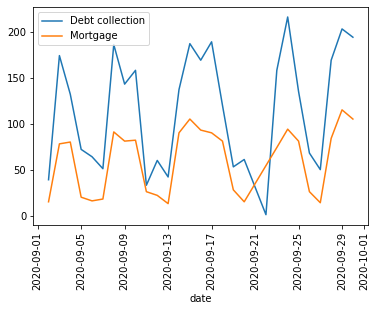

In [271]:
grouped.set_index('date', inplace=True)
grouped.groupby('product')['size'].plot(legend = True, rot = 90)